Training data shape: (20000, 28, 56)
Training labels shape: (20000, 2)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 28, 56)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 1568)      │          0 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │    401,664 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit1 (Dense)      │ (None, 10)        │      2,570 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit2 (Dense)      │ (None, 10)        │      2,570 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 406,804 (1.55 MB)

 Trainable params: 406,804 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - digit1_accuracy: 0.7014 - digit1_loss: 1.0072 - digit2_accuracy: 0.6886 - digit2_loss: 1.0099 - loss: 2.0172 - val_digit1_accuracy: 0.9000 - val_digit1_loss: 0.3572 - val_digit2_accuracy: 0.8845 - val_digit2_loss: 0.3444 - val_loss: 0.7006
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - digit1_accuracy: 0.9097 - digit1_loss: 0.3127 - digit2_accuracy: 0.9065 - digit2_loss: 0.3191 - loss: 0.6318 - val_digit1_accuracy: 0.9090 - val_digit1_loss: 0.3147 - val_digit2_accuracy: 0.9060 - val_digit2_loss: 0.2979 - val_loss: 0.6110
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - digit1_accuracy: 0.9257 - digit1_loss: 0.2561 - digit2_accuracy: 0.9219 - digit2_loss: 0.2676 - loss: 0.5237 - val_digit1_accuracy: 0.9155 - val_digit1_loss: 0.2923 - val_digit2_accuracy: 0.9185 - val_digit2_loss: 0.2649 - val_loss: 0.5565
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - digit1_accuracy: 0.9434 - digit1_loss: 0.2044 - digit2_accuracy:

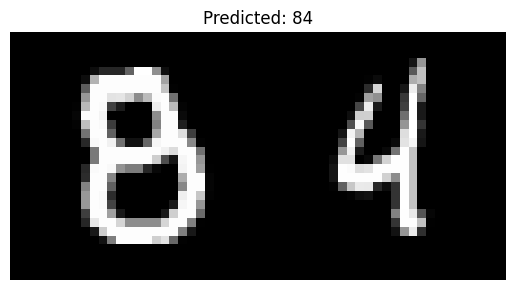

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Load MNIST dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# 2. Create Double Digit Dataset

def create_double_digits(x, y, samples=20000):
    X_new = []
    y_new = []

    for _ in range(samples):
        i, j = np.random.randint(0, len(x), 2)
        img = np.hstack((x[i], x[j]))   # join horizontally
        label = [y[i], y[j]]

        X_new.append(img)
        y_new.append(label)

    return np.array(X_new), np.array(y_new)

X_train2, y_train2 = create_double_digits(x_train, y_train)
X_test2, y_test2 = create_double_digits(x_test, y_test, 2000)

print("Training data shape:", X_train2.shape)
print("Training labels shape:", y_train2.shape)


# 3. Build Model

input_layer = layers.Input(shape=(28, 56))

x = layers.Flatten()(input_layer)
x = layers.Dense(256, activation="relu")(x)

out1 = layers.Dense(10, activation="softmax", name="digit1")(x)
out2 = layers.Dense(10, activation="softmax", name="digit2")(x)

model = models.Model(inputs=input_layer, outputs=[out1, out2])

# 4. Compile Model (FIXED)

model.compile(
    optimizer="adam",
    loss={
        "digit1": "sparse_categorical_crossentropy",
        "digit2": "sparse_categorical_crossentropy"
    },
    metrics={
        "digit1": "accuracy",
        "digit2": "accuracy"
    }
)

model.summary()

# 5. Train Model

model.fit(
    X_train2,
    [y_train2[:, 0], y_train2[:, 1]],
    epochs=5,
    batch_size=128,
    validation_split=0.1
)

# 6. Test Prediction

sample = 0

pred1, pred2 = model.predict(X_test2[sample:sample+1])

d1 = np.argmax(pred1)
d2 = np.argmax(pred2)

print("\nPredicted number:", f"{d1}{d2}")
print("Actual number   :", f"{y_test2[sample][0]}{y_test2[sample][1]}")

# 7. Show Image

plt.imshow(X_test2[sample], cmap="gray")
plt.title(f"Predicted: {d1}{d2}")
plt.axis("off")
plt.show()